# Initializing and Importing

In [6]:
# Some standard imports for math and data handling
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Imports for processing specific to this workbook
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from datetime import datetime

# Import the custom code developed for this work
sys.path.append('python')
from clusterOutliers import clusterOutliers as coo

%matplotlib inline

In [67]:
featCSV = "/home/dgiles/Documents/KeplerLCs/output/Q4_output.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/Q4fitsfiles" # path to fits files
Q4_sample = coo(featCSV,fitsDir)

In [2]:
def dataScaler(qdf,nfeats=60):
    """
    Data scaler for this work, returns a dataframe w/ scaled features
    """
    data = qdf.iloc[:,0:nfeats]
    scaler = preprocessing.StandardScaler().fit(data)
    scaled_data = scaler.transform(data)
    scaled_df = pd.DataFrame(index=qdf.index,\
                             columns=qdf.columns[:nfeats],\
                             data=scaled_data)
    return scaled_df

In [3]:
def import_quarter(QN='Q4'):
    # Import the dataframe containing the data
    featCSV = "/home/dgiles/Documents/KeplerLCs/output/"+QN+"_FullSample.csv" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
    fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/"+QN+"fitsfiles" # path to fits files folder
    return coo(featCSV,fitsDir)

Q4p = import_quarter('Q4')
Q8p = import_quarter('Q8')
Q11p = import_quarter('Q11')
Q16p = import_quarter('Q16')

In [4]:
def import_quarter(QN='Q4'):
    # Import the dataframe containing the data
    PCA_folder = "/home/dgiles/Documents/KeplerLCs/output/PCA_reductions/"
    featCSV = PCA_folder+QN+"_base" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
    fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/"+QN+"fitsfiles" # path to fits files folder
    return coo(featCSV,fitsDir)

Q4b = import_quarter('Q4')
Q8b = import_quarter('Q8')
Q11b = import_quarter('Q11')
Q16b = import_quarter('Q16')

In [5]:
def import_quarter(QN='Q4'):
    # Import the dataframe containing the data
    PCA_folder = "/home/dgiles/Documents/KeplerLCs/output/PCA_reductions/"
    featCSV90 = PCA_folder+QN+"_PCA90" # Path to csv containing feature data (should be a pandas dataframe saved as a csv)
    featCSV95 = PCA_folder+QN+"_PCA95"
    featCSV99 = PCA_folder+QN+"_PCA99"
    fitsDir = "/home/dgiles/Documents/KeplerLCs/fitsFiles/"+QN+"fitsfiles" # path to fits files folder
    return coo(featCSV90,fitsDir),coo(featCSV95,fitsDir),coo(featCSV99,fitsDir)

Q4_pca90,Q4_pca95,Q4_pca99 = import_quarter('Q4')
Q8_pca90,Q8_pca95,Q8_pca99 = import_quarter('Q8')
Q11_pca90,Q11_pca95,Q11_pca99 = import_quarter('Q11')
Q16_pca90,Q16_pca95,Q16_pca99 = import_quarter('Q16')

### Saving dataframes

In [113]:
def save_dfs(PCA_folder = "/home/dgiles/Documents/KeplerLCs/output/PCA_reductions/"):
    """
    Save function specific to this workbook.
    
    !!!THIS WILL OVERWRITE EXISTING FILES!!!
    """
    Q4_pca90.data.to_csv(PCA_folder+"Q4_PCA90")
    Q4_pca95.data.to_csv(PCA_folder+"Q4_PCA95")
    Q4_pca99.data.to_csv(PCA_folder+"Q4_PCA99")
    Q4b.data.to_csv(PCA_folder+"Q4_base")

    Q8_pca90.data.to_csv(PCA_folder+"Q8_PCA90")
    Q8_pca95.data.to_csv(PCA_folder+"Q8_PCA95")
    Q8_pca99.data.to_csv(PCA_folder+"Q8_PCA99")
    Q8b.data.to_csv(PCA_folder+"Q8_base")

    Q11_pca90.data.to_csv(PCA_folder+"Q11_PCA90")
    Q11_pca95.data.to_csv(PCA_folder+"Q11_PCA95")
    Q11_pca99.data.to_csv(PCA_folder+"Q11_PCA99")
    Q11b.data.to_csv(PCA_folder+"Q11_base")

    Q16_pca90.data.to_csv(PCA_folder+"Q16_PCA90")
    Q16_pca95.data.to_csv(PCA_folder+"Q16_PCA95")
    Q16_pca99.data.to_csv(PCA_folder+"Q16_PCA99")
    Q16b.data.to_csv(PCA_folder+"Q16_base")
    
    return

# Scoring

## Distance based

This is essentially the most naive scoring metric given how clusters/outliers are defined. The metric is simply the distance to the k-th neighbor, min-max normalized from 0 to 1.

In [7]:
def dist_score(data,d2s=None,k=59):
    """
    Args:
        data (Numpy array or Pandas dataframe) - Full set of data
        d2s (Numpy array or Pandas dataframe) - Subset of data to be scored
        k (integer) - Neighbor to which the distance is considered the score
        
    Returns:
        scores (Numpy array) - MinMax scaled scores for data in d2s. 
    """
    # For Kepler data common to quarters 4, 8, 11, and 16, k=59 was determined to be useful.
    if type(d2s)==None:
        d2s=data
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree',n_jobs=-1).fit(data)
    distances, indices = nbrs.kneighbors(d2s)
    scores = distances[:,k]
    scores = (scores-scores.min())/(scores.max()-scores.min()) #min max scaled
    # TODO: readjust scaling so that the extreme outliers don't affect scores of the rest.
    # Potentially scale 90th percentile, define all beyond that as having a score of 1.
    
    return scores

In [32]:
startTime = datetime.now()
scaled_data = dataScaler(Q4_pca90.data,18)
Q4_pca90.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

Time to process: 0:07:25.369358


In [34]:
startTime = datetime.now()
Q = Q4_pca95
scaled_data = dataScaler(Q.data,23)
Q.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

Time to process: 0:06:32.695102


In [35]:
startTime = datetime.now()
Q = Q4_pca99
scaled_data = dataScaler(Q.data,35)
Q.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

Time to process: 0:10:24.099828


In [36]:
startTime = datetime.now()
Q = Q4b
scaled_data = dataScaler(Q.data,60)
Q.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

Time to process: 0:11:04.751276


In [33]:
startTime = datetime.now()
scaled_data = dataScaler(Q4p.data,60)
Q4p.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

Time to process: 0:11:41.301231


In [111]:
"""
Tested everything on Q4, now the big batch of the rest...
"""

startTime = datetime.now()
Q = Q8_pca90
scaled_data = dataScaler(Q.data,18)
Q.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

startTime = datetime.now()
Q = Q8_pca95
scaled_data = dataScaler(Q.data,24)
Q.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

startTime = datetime.now()
Q = Q8_pca99
scaled_data = dataScaler(Q.data,36)
Q.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

startTime = datetime.now()
Q = Q8b
scaled_data = dataScaler(Q.data,60)
Q.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

startTime = datetime.now()
Q = Q11_pca90
scaled_data = dataScaler(Q.data,17)
Q.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

startTime = datetime.now()
Q = Q11_pca95
scaled_data = dataScaler(Q.data,22)
Q.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

startTime = datetime.now()
Q = Q11_pca99
scaled_data = dataScaler(Q.data,34)
Q.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

startTime = datetime.now()
Q = Q11b
scaled_data = dataScaler(Q.data,60)
Q.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

startTime = datetime.now()
Q = Q16_pca90
scaled_data = dataScaler(Q.data,17)
Q.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

startTime = datetime.now()
Q = Q16_pca95
scaled_data = dataScaler(Q.data,23)
Q.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

startTime = datetime.now()
Q = Q16_pca99
scaled_data = dataScaler(Q.data,34)
Q.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

startTime = datetime.now()
Q = Q16b
scaled_data = dataScaler(Q.data,60)
Q.data['dist_score'] = dist_score(scaled_data)
print("Time to process: {}".format(datetime.now()-startTime))

Time to process: 0:05:01.335635
Time to process: 0:08:52.287419
Time to process: 0:11:35.971695
Time to process: 0:11:42.677759
Time to process: 0:06:53.807435
Time to process: 0:08:59.053672
Time to process: 0:10:53.303749
Time to process: 0:12:01.740497
Time to process: 0:05:52.763921
Time to process: 0:08:33.350284
Time to process: 0:10:57.744959
Time to process: 0:12:12.911739


In [ ]:
def keys_gen(suffix='_default',Qs=['Q4','Q8','Q11','Q16']):
    """
    Generates keys for a dictionary containing quarter specific variables or objects.
    """
    keys = []
    for Q in Qs:
        new_vars.append(Q+suffix)
    return keys

In [ ]:

pca90_keys = keys_gen(suffix="_PCA90")

### Comparing Scores

In [45]:
scores_df = pd.DataFrame({
    "Paper":Q4p.data.dist_score.as_matrix(),
    "Baseline":Q4b.data.dist_score.as_matrix(),
    "PCA90":Q4_pca90.data.dist_score.as_matrix(),
    "PCA95":Q4_pca95.data.dist_score.as_matrix(),
    "PCA99":Q4_pca99.data.dist_score.as_matrix()},
    index=Q4p.data.index)

In [46]:
scores_df[:10]

,Baseline,PCA90,PCA95,PCA99,Paper
KID,,,,,
kplr000757076,0.000731,0.000703,0.001019,0.001081,0.000731
kplr000757099,0.011201,0.010491,0.012203,0.023930,0.011201
kplr000757137,0.002736,0.002716,0.003718,0.006185,0.002736
kplr000757280,0.001545,0.001502,0.001922,0.003151,0.001545
kplr000757450,0.004902,0.004618,0.005869,0.007482,0.004902
kplr000891901,0.000763,0.000610,0.000711,0.001834,0.000763
kplr000891916,0.003161,0.002746,0.003806,0.005731,0.003161
kplr000892107,0.000658,0.000525,0.001030,0.001223,0.000658
kplr000892195,0.000465,0.000471,0.000594,0.000568,0.000465


In [47]:
scores_df['rank_paper']=scores_df.Paper.rank(ascending=False)
scores_df['rank_baseline']=scores_df.Baseline.rank(ascending=False)
scores_df['rank_90']=scores_df.PCA90.rank(ascending=False)
scores_df['rank_95']=scores_df.PCA95.rank(ascending=False)
scores_df['rank_99']=scores_df.PCA99.rank(ascending=False)

In [48]:
scores_df.sort_values(by='rank_paper',axis=0)[:10]

,Baseline,PCA90,PCA95,PCA99,Paper,rank_paper,rank_baseline,rank_90,rank_95,rank_99
KID,,,,,,,,,,
kplr007446357,1.000000,0.783049,0.801750,0.851316,1.000000,1.0,1.0,3.0,3.0,3.0
kplr007659570,0.972632,0.647217,0.653950,0.792679,0.972632,2.0,2.0,4.0,4.0,4.0
kplr007691527,0.958985,1.000000,1.000000,1.000000,0.958985,3.0,3.0,1.0,1.0,1.0
kplr007679979,0.897389,0.843297,0.915862,0.933211,0.897389,4.0,4.0,2.0,2.0,2.0
kplr007033135,0.363232,0.386684,0.598600,0.687319,0.363232,5.0,5.0,9.0,5.0,5.0
kplr005772512,0.341698,0.569547,0.568416,0.566186,0.341698,6.0,6.0,5.0,6.0,6.0
kplr009098388,0.331419,0.552533,0.551449,0.549281,0.331419,7.0,7.0,6.0,7.0,7.0
kplr007950964,0.314666,0.359100,0.421939,0.537986,0.314666,8.0,8.0,10.0,9.0,8.0
kplr003866709,0.283594,0.229782,0.246332,0.387561,0.283594,9.0,9.0,21.0,23.0,15.0


Evidently the PCA reduction impacts even the most outlying points somewhat significantly. Which, though, do we interpret to be more representative of the truth?

### Looking at lightcurves

In [58]:
import quarterTools as qt

In [69]:
def import_generator(suffix='_FullSample.csv'):
    return lambda QN: coo("/home/dgiles/Documents/KeplerLCs/output/"+QN+suffix,"/home/dgiles/Documents/KeplerLCs/fitsFiles/"+QN+"fitsfiles")

In [70]:
# Need the full file names, which are stored in Q*_output.csv

import_quarter = import_generator("_output.csv")

Q4_full = import_quarter('Q4')
Q8_full = import_quarter('Q8')
Q11_full = import_quarter('Q11')
Q16_full = import_quarter('Q16')

In [95]:
FullSample = qt.make_sampler(Q4p.data.index)
Q4_full = FullSample(Q4_full.data.index)
Q8_full = FullSample(Q8_full.data)
Q11_full = FullSample(Q11_full.data)
Q16_full = FullSample(Q16_full.data)

In [96]:
Q4p.data.index = Q4_full.index
Q8p.data.index = Q8_full.index
Q11p.data.index = Q11_full.index
Q16p.data.index = Q16_full.index

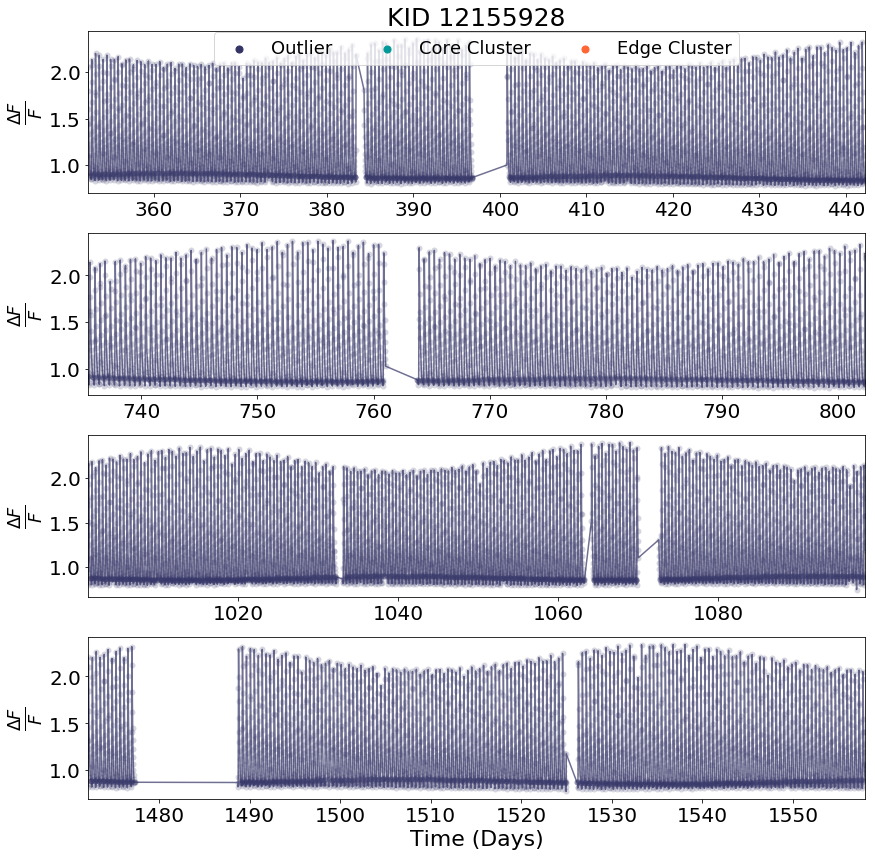

In [109]:
qt.four_Q_lc(scores_df.sort_values(by='rank_paper',axis=0).index[9],Q4p,Q8p,Q11p,Q16p)

In [54]:
base_pap_rankdiff = scores_df.rank_baseline - scores_df.rank_paper

print("Min diff: {}, Max diff: {}".format(base_pap_rankdiff.min(),base_pap_rankdiff.max()))

Min diff: 0.0, Max diff: 0.0


In [56]:
pca90_paper_rankdiff = scores_df.rank_90[Q4p.data.db_out==-1] - scores_df.rank_paper[Q4p.data.db_out==-1]

print("Min diff: {}, Max diff: {}".format(pca90_paper_rankdiff.min(),pca90_paper_rankdiff.max()))

Min diff: -2177.0, Max diff: 9713.0


In [9]:
%%timeit
# Only scoring outliers:
startTime = datetime.now()
scaled_data = dataScaler(Q4_pca90.data,18)
out_data = scaled_data[Q4_pca90.data.db_out==-1]
Q4_pca90.out_scores = dist_score(scaled_data,out_data)
print("Time to process: {}".format(datetime.now()-startTime))

Time to process: 0:00:07.226125
Time to process: 0:00:04.924436
Time to process: 0:00:05.032647
Time to process: 0:00:05.042726
Time to process: 0:00:04.951796
Time to process: 0:00:05.492265
Time to process: 0:00:05.650638
Time to process: 0:00:05.619863
5.25 s ± 303 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
scores_df = pd.DataFrame(index=Q4_pca90.data[Q4_pca90.data.db_out==-1].index,
                         columns=['Scores'],
                         data=Q4_pca90.out_scores)

In [31]:
scores_df.sort_values(by='rank',axis=0)[:10]

,Scores,rank
KID,,
kplr007691527,1.000000,1.0
kplr007679979,0.841647,2.0
kplr007446357,0.781516,3.0
kplr007659570,0.644891,4.0
kplr005772512,0.566614,5.0
kplr009098388,0.549499,6.0
kplr009408009,0.421804,7.0
kplr003440230,0.398901,8.0
kplr007033135,0.382397,9.0


In [30]:
scores_df['rank']=scores_df.rank(ascending=False)

(array([  2.03900000e+03,   6.95000000e+02,   2.41000000e+02,
          6.90000000e+01,   4.50000000e+01,   2.00000000e+01,
          1.80000000e+01,   3.00000000e+00,   1.00000000e+01,
          4.00000000e+00,   6.00000000e+00,   7.00000000e+00,
          5.00000000e+00,   5.00000000e+00,   6.00000000e+00,
          6.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          5.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

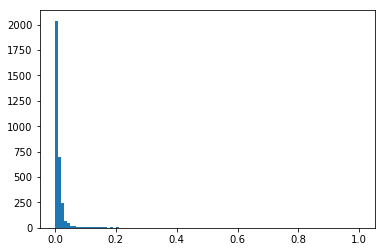

In [15]:
bins = np.linspace(0,1,100)
plt.hist(Q4_pca90.out_scores,bins=bins,log=False)

In [13]:
np.percentile(Q4_pca90.out_scores,90)

0.02660866286119425

Only scoring outliers produces a significant speedup (5s vs 400+s). This does, however, require the prerequisite of already having outliers.

In [117]:
scores = Q4_pca90.data.dist_score[Q4_pca90.data.db_out==-1]
scores = (scores-scores.min())/(scores.max()-scores.min())

In [119]:
score_diff = abs(Q4_pca90.out_scores - scores)
print("""
The absolute maximum difference between scores is {:05.3f}, a {:04.1f}% difference.
""".format(score_diff.max(),score_diff.max()*100))


The absolute maximum difference between scores is 0.002, a 00.2% difference.



In [112]:
score_diff = abs(Q4_pca90.out_scores - Q4_pca90.data.dist_score[Q4_pca90.data.db_out==-1])
print("""
The absolute maximum difference between scores is {:05.3f}, a {:04.1f}% difference.
""".format(score_diff.max(),score_diff.max()*100))


The absolute maximum difference between scores is 0.008, a 00.8% difference.



The difference between scores of the outliers when scoring the whole set versus scoring only the outliers is negligible, producing <1% differences at worst. (1% of the range in which outlier scores are normalized to). The only reason for the difference appears to be where 0 is set.

(array([  1.65000000e+02,   2.14100000e+03,   5.14000000e+02,
          1.81000000e+02,   5.90000000e+01,   3.90000000e+01,
          1.80000000e+01,   1.10000000e+01,   6.00000000e+00,
          8.00000000e+00,   6.00000000e+00,   5.00000000e+00,
          6.00000000e+00,   4.00000000e+00,   7.00000000e+00,
          5.00000000e+00,   6.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

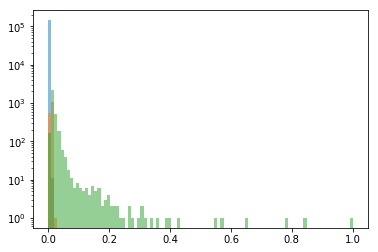

In [57]:
bins = np.linspace(0,1,100)
plt.hist(Q4_pca90.data.dist_score[Q4_pca90.data.db_out==0],bins=bins,log=True,alpha=0.5)
plt.hist(Q4_pca90.data.dist_score[Q4_pca90.data.db_out==1],bins=bins,log=True,alpha=0.5)
plt.hist(Q4_pca90.data.dist_score[Q4_pca90.data.db_out==-1],bins=bins,log=True,alpha=0.5)

In [ ]:
bins = np.linspace(0,1,100)
plt.hist(scores,bins=bins,log=True,alpha=0.5)
plt.hist(Q4_pca90.out_scores,bins=bins,log=True,alpha=0.5)

In [59]:
Q4_pca90.data.index[Q4_pca90.data.dist_score>0.5]

Index(['kplr005772512', 'kplr007446357', 'kplr007659570', 'kplr007679979',
       'kplr007691527', 'kplr009098388'],
      dtype='object', name='KID')

## Some plots

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [203]:
Q4_pca90.data[Q4_pca90.data.columns[:5]][:10]

,0,1,2,3,4
KID,,,,,
kplr000757076,-0.506421,-0.434655,-0.167335,-0.653499,1.755279
kplr000757099,4.484396,-0.604195,1.211985,-4.750476,-2.081261
kplr000757137,0.920785,-3.099399,0.623951,-2.486847,-2.150655
kplr000757280,0.139649,-2.545948,0.364790,-0.499807,0.013925
kplr000757450,1.470896,-2.336332,0.516864,0.586687,-0.658776
kplr000891901,-0.620495,-0.222029,-0.081033,0.249993,1.040637
kplr000891916,1.590050,-4.515782,1.260458,0.351274,-1.284734
kplr000892107,-0.504158,-0.360687,-0.112151,-0.705359,1.315910
kplr000892195,-0.774194,1.081286,-0.064552,0.511291,-0.390051


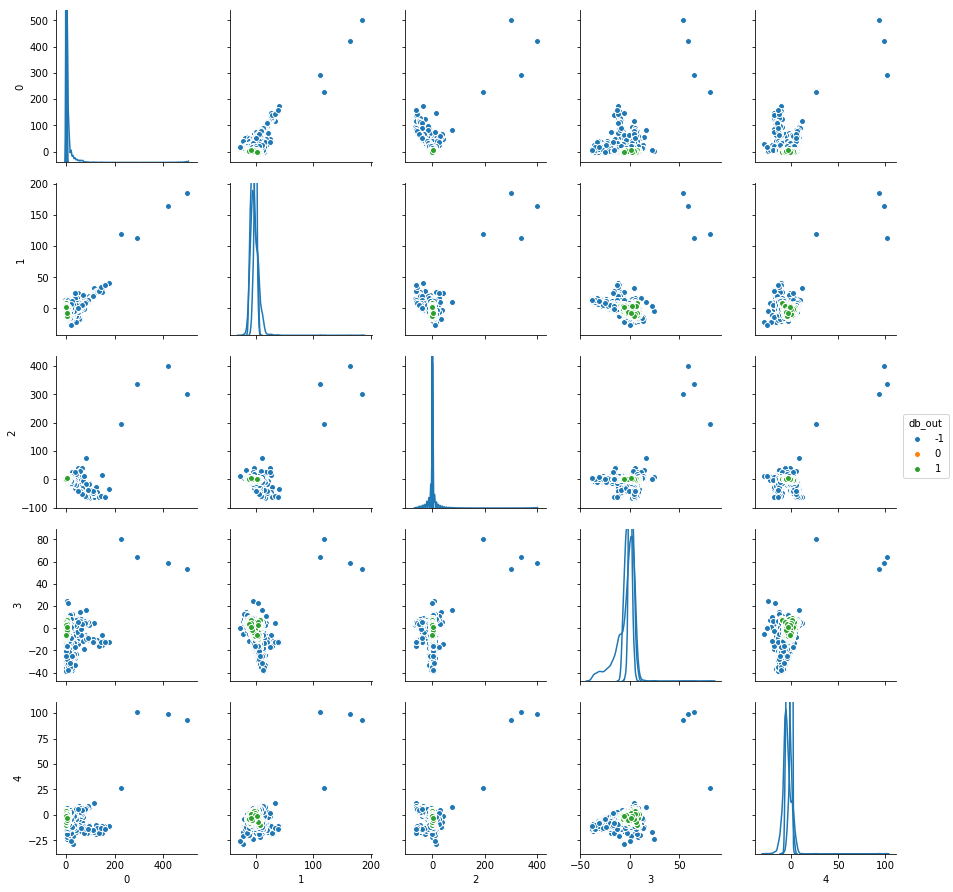

In [213]:
sns.pairplot(Q4_pca90.data,vars=['0','1','2','3','4'],hue='db_out',diag_kind='kde')

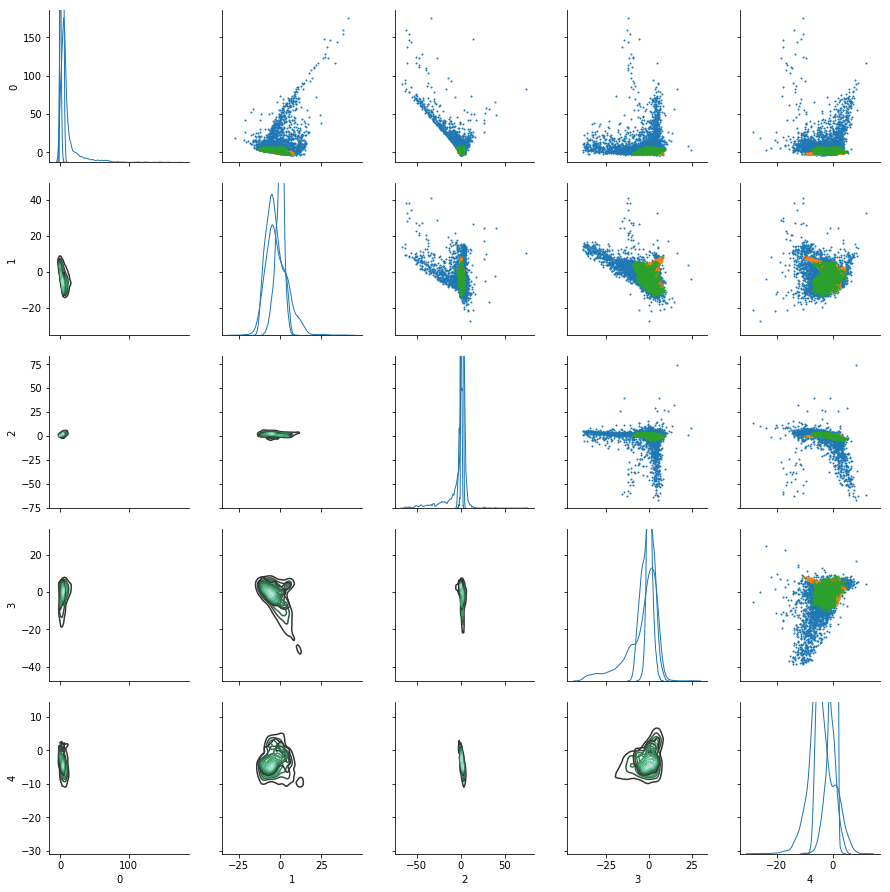

In [215]:
PG = sns.PairGrid(Q4_pca90.data[Q4_pca90.data['1']<75],vars=['0','1','2','3','4'],hue='db_out')
PG.map_lower(sns.kdeplot)
PG.map_upper(plt.scatter, edgecolor=None,s=1)
PG.map_diag(sns.kdeplot, lw=1)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = Q4_pca90.data[Q4_pca90.data.db_out==0]
xs = data['1']
ys = data['2']
zs = data['3']
#cs = Q4_pca90.data['db_out']
ax.scatter(xs, ys, zs,c=cs)


ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "/home/dgiles/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py", line 141, in to_rgba
    rgba = _colors_full_map.cache[c, alpha]
TypeError: unhashable type: 'numpy.ndarray'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/dgiles/anaconda/envs/py36/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/dgiles/anaconda/envs/py36/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/dgiles/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/dgiles/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    hand